# Lorenz Attractor
by [Paulo Marques](http://pmarques.eu), 2013/09/21

---

This notebook implements the beautiful Lorenz Attractor in Python. The Lorenz Attractor is probably the 
most ilustrative example of a system that exibits cahotic behaviour. Slightly changing the initial conditions
of the system leads to completely different solutions. The system itself corresponds to the movement of a point
particle in a 3D space over time.

<center>
![Lorenz Attractor](http://upload.wikimedia.org/wikipedia/commons/e/e0/Lorenz.png)
</center>

The system is formally described by three different differential equations. These equations represent the movement
of a point $(x, y, z)$ in space over time. In the following equations, $t$ represents time, $\sigma$, $\rho$, $\beta$ are constants.

$$ \frac{dx}{dt} = \sigma (y - x) $$

$$ \frac{dy}{dt} = x (\rho - z) - y $$

$$ \frac{dz}{dt} = x y - \beta z $$

Let's implement it in python.

---

Let's start by importing some basic libraries.

In [1]:
%matplotlib inline
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from pylab import *

We need to define the system of differential equations as an equation of the form: ${\bf r}' = {\bf f}({\bf r},t)$ where ${\bf r} = (x, y, z)$ and ${\bf f}({\bf r},t)$ is the mapping function.

In [2]:
def f(r, t):
    (x, y, z) = r
    
    # The Lorenz equations
    dx_dt = sigma*(y - x)
    dy_dt = x*(rho - z) - y
    dz_dt = x*y - beta*z
    
    return [dx_dt, dy_dt, dz_dt]    

Let's define the initial conditions of the system ${\bf r}_0 = (x_0, y_0, z_0)$, the constants $\sigma$, $\rho$ and $\beta$ and a time grid.

In [3]:
# Initial position in space
r0 = [0.1, 0.0, 0.0]

# Constants sigma, rho and beta
sigma = 10.0
rho   = 28.0
beta  = 8.0/3.0

# Time grid
tf = 100.0
t = linspace(0, tf, int(tf*100))

Now let's solve the differencial equations numericaly and extract the corresponding $(x, y, z)$:

In [4]:
pos = odeint(f, r0, t)

x = pos[:, 0]
y = pos[:, 1]
z = pos[:, 2]

Let's see how it looks in 3D.

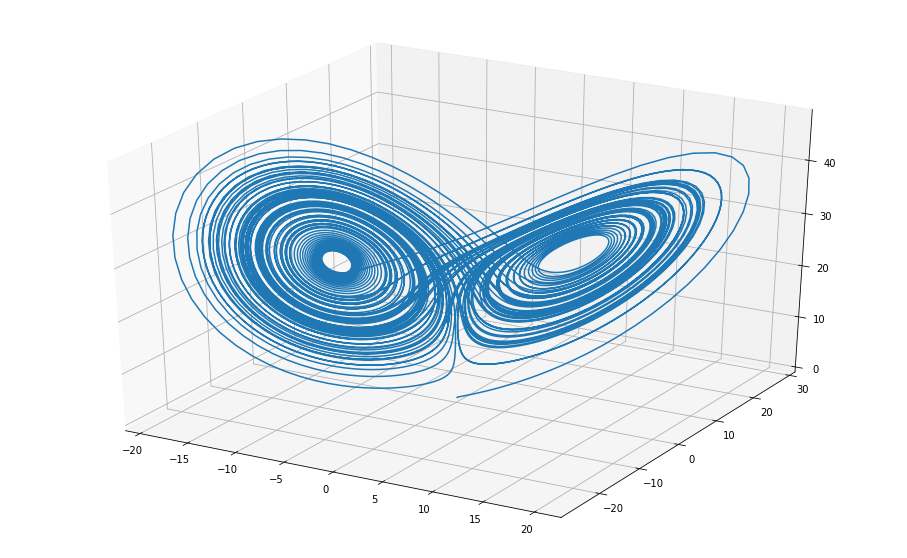

In [5]:
fig = figure(figsize=(16,10))
ax = fig.gca(projection='3d')
ax.plot(x, y, z)

Let's see different cuts around the axes:

Text(0.5, 1.0, 'Y-Z cut')

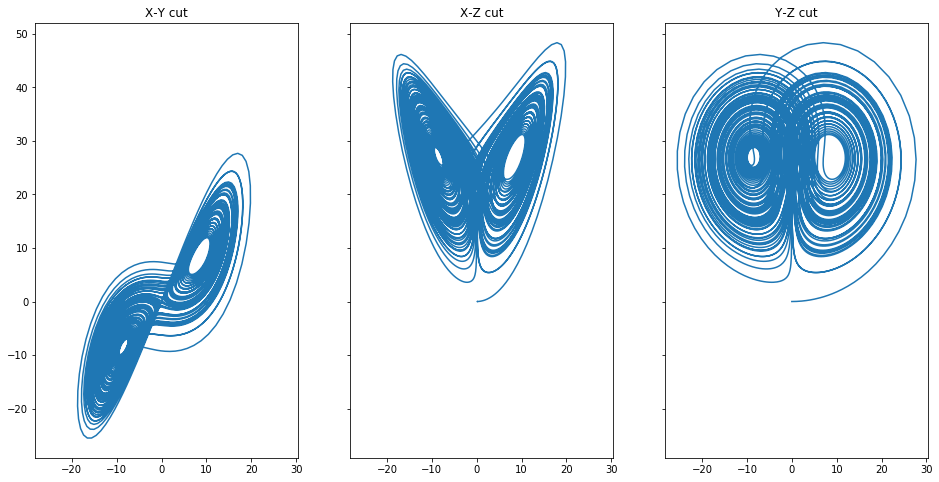

In [6]:
fig, ax = subplots(1, 3, sharex=True, sharey=True, figsize=(16,8))

ax[0].plot(x, y)
ax[0].set_title('X-Y cut')

ax[1].plot(x, z)
ax[1].set_title('X-Z cut')

ax[2].plot(y, z)
ax[2].set_title('Y-Z cut')

---

# MIT LICENSE

> Copyright (C) 2013 Paulo Marques (pjp.marques@gmail.com)
>
> Permission is hereby granted, free of charge, to any person obtaining a copy of 
> this software and associated documentation files (the "Software"), to deal in
> the Software without restriction, including without limitation the rights to
> use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
> the Software, and to permit persons to whom the Software is furnished to do so,
> subject to the following conditions:
>  
> The above copyright notice and this permission notice shall be included in all 
> copies or substantial portions of the Software.
> 
> THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
> IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
> FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
> COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
> IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN 
> CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.